In [ ]:
# Prediction of Chronic Kidney Disease using Machine Learning


In [49]:
# Make necessary imports
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()   # by default ur graph comes in proper dimension o need to tell figsize and all
import warnings
warnings.filterwarnings('ignore')

In [50]:
# load the file
df=pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,0.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [51]:
df.info()
# we have 400 data and most of the colmns have missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [52]:
# we need to do Feature Engineering thoroughly

In [53]:
df.isnull().sum()/len(df) *100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [54]:
# below features a=have more then 25% missing data
# rbc,rc,wc--- we should not drop these as these are possibly significant variables 
# as per problem statement missing values needs to be handled on the basis of distribution

In [55]:
# rbc,rc,wc are all object type so we will use imputation values
# we can use sklearn to impute all 
from sklearn.impute import SimpleImputer

In [56]:
imp_mode=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
# one problem with sklearn is it converts the data into arrray format
# everything be it train test split or standardization etc.
# so we need to convert into df

# we need to use mean as well depending on the columns but we did it jus to be fast
df_imputed=pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns=df.columns
df_imputed.head()

# we can use knn imputer as well which checks for the nearest value

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,0.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [57]:
df_imputed.isnull().sum()/len(df) *100

id                0.0
age               0.0
bp                0.0
sg                0.0
al                0.0
su                0.0
rbc               0.0
pc                0.0
pcc               0.0
ba                0.0
bgr               0.0
bu                0.0
sc                0.0
sod               0.0
pot               0.0
hemo              0.0
pcv               0.0
wc                0.0
rc                0.0
htn               0.0
dm                0.0
cad               0.0
appet             0.0
pe                0.0
ane               0.0
classification    0.0
dtype: float64

In [58]:
for i in df_imputed.columns:
    print('***************************',i,
         '******************************')
    print()
    print(set(df_imputed[i].tolist()))    # set will only give unique values
    print()

# few things which we notice is BP can't be zero
# hemoglobin cant be zero
#dm \tno', '\tyes',
# pcv have '\t?'  which is invalid
# we should always do this step to glance over the data

*************************** id ******************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 2

In [59]:
df_imputed['bp']=np.where(df_imputed['bp']==0,df_imputed['bp'].median(),df_imputed['bp'])
df_imputed['hemo']=np.where(df_imputed['hemo']==0,df_imputed['hemo'].median(),df_imputed['hemo'])


In [60]:
for i in df_imputed.columns:
    print('***************************',i,
         '******************************')
    print()
    print(set(df_imputed[i].tolist()))    # set will only give unique values
    print()

*************************** id ******************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 2

In [61]:
df_imputed['dm']=df_imputed['dm'].apply(lambda x:'yes'if x=='\tyes' else x)
df_imputed['dm']=df_imputed['dm'].apply(lambda x:'yes'if x==' yes' else x)
df_imputed['dm']=df_imputed['dm'].apply(lambda x:'no'if x=='\tno' else x)

In [80]:
df_imputed['cad']=df_imputed['cad'].apply(lambda x:'no'if x=='\tno' else x)
df_imputed['classification']=df_imputed['classification'].apply(lambda x:'ckd'if x=='ckd\t' else x)

In [81]:
# check again
for i in df_imputed.columns:
    print('***************************',i,
         '******************************')
    print()
    print(set(df_imputed[i].tolist()))    # set will only give unique values
    print()
# steill few are there we will fix them as well

*************************** id ******************************

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149

In [63]:
df_imputed['wc'].mode()

0    9800
Name: wc, dtype: object

In [64]:
df_imputed['wc']=df_imputed['wc'].apply(lambda x:'9800'if x=='\t?' else x)
df_imputed['wc']=df_imputed['wc'].apply(lambda x:'6200'if x=='\t6200' else x)
df_imputed['wc']=df_imputed['wc'].apply(lambda x:'8400'if x=='\t8400' else x)

In [65]:
df_imputed['pcv'].mode()

0    41
Name: pcv, dtype: object

In [66]:
df_imputed['pcv']=df_imputed['pcv'].apply(lambda x:'43'if x=='\t43' else x)
df_imputed['pcv']=df_imputed['pcv'].apply(lambda x:'41'if x=='\t?' else x)

In [67]:
df_imputed['rc'].mode()

0    5.2
Name: rc, dtype: object

In [68]:
df_imputed['rc']=df_imputed['rc'].apply(lambda x:'5.2'if x=='\t?' else x)

In [79]:
# check again
for i in df_imputed.columns:
    print('***************************',i,
         '******************************')
    print()
    print(set(df_imputed[i].tolist()))    # set will only give unique values
    print()
# Now its perfect

*************************** id ******************************

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149

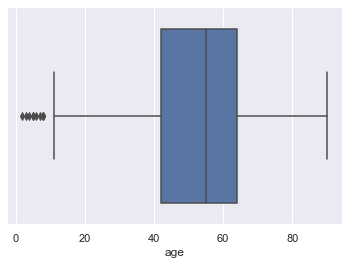

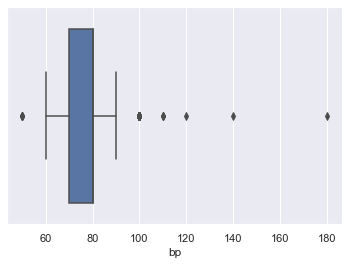

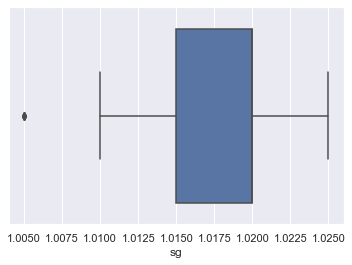

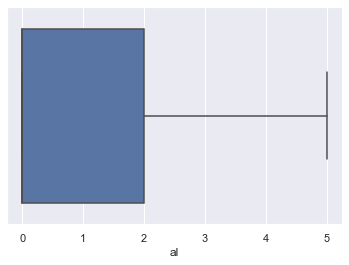

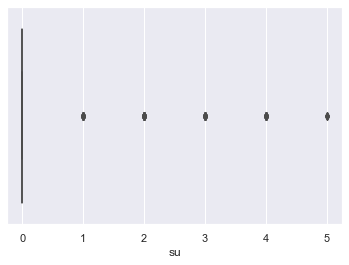

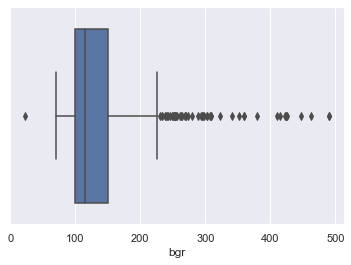

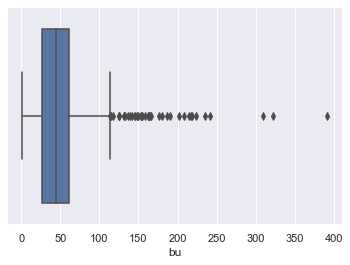

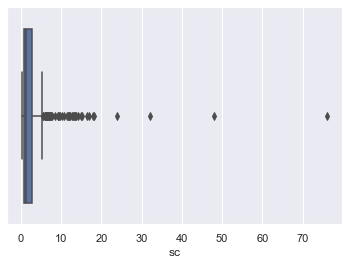

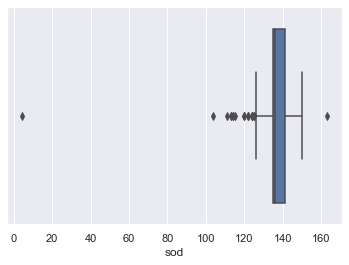

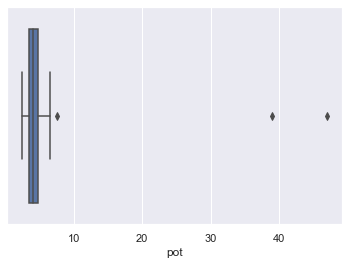

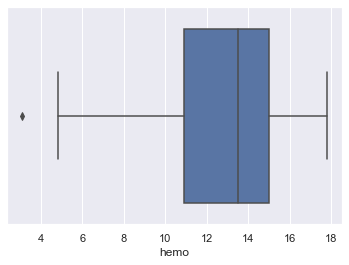

In [30]:
def boxplots(col):
    sns.boxplot(df_imputed[col])
    plt.show()

for i in list(df.select_dtypes(exclude=['object']).columns)[1:]:
    boxplots(i)
    
    # not working as all in objects format..so we will plot of df just for example

In [34]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              400 non-null    object
 1   age             400 non-null    object
 2   bp              400 non-null    object
 3   sg              400 non-null    object
 4   al              400 non-null    object
 5   su              400 non-null    object
 6   rbc             400 non-null    object
 7   pc              400 non-null    object
 8   pcc             400 non-null    object
 9   ba              400 non-null    object
 10  bgr             400 non-null    object
 11  bu              400 non-null    object
 12  sc              400 non-null    object
 13  sod             400 non-null    object
 14  pot             400 non-null    object
 15  hemo            400 non-null    object
 16  pcv             400 non-null    object
 17  wc              400 non-null    object
 18  rc        

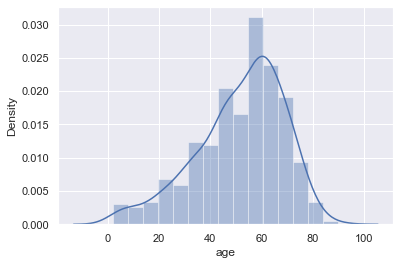

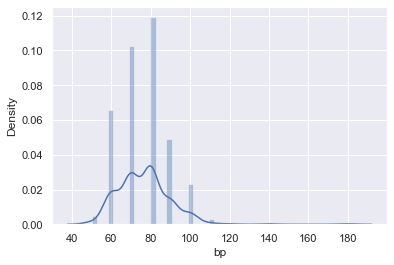

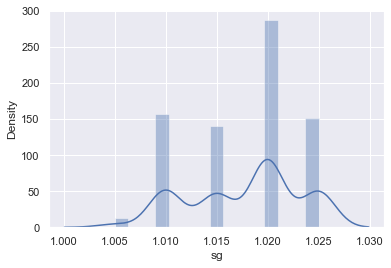

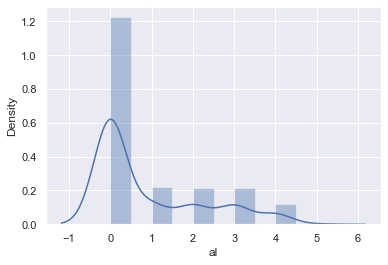

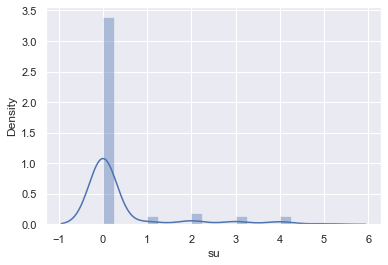

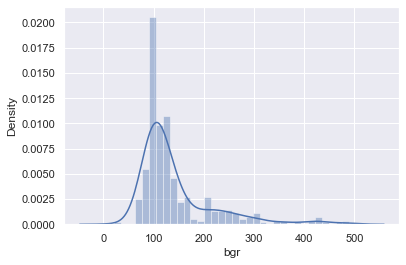

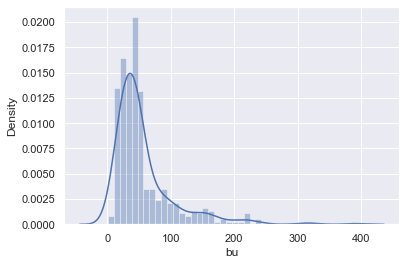

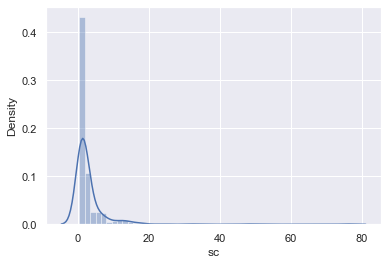

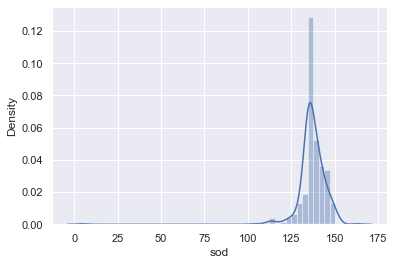

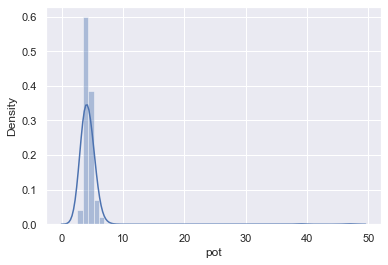

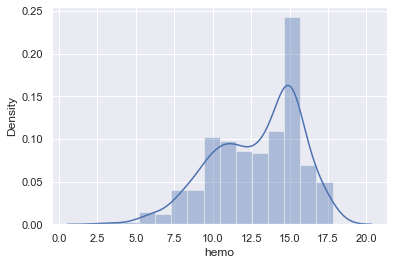

In [33]:
def distplots(col):
    sns.distplot(df_imputed[col])
    plt.show()

for i in list(df.select_dtypes(exclude=['object']).columns)[1:]:
    distplots(i)
    

In [69]:
# We need to change the object to float value whichever is applicable
for i in df.select_dtypes(exclude=['object']).columns:
    df_imputed[i]=df_imputed[i].apply(lambda x : float(x))

In [70]:
df_imputed.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [72]:
df_imputed.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [73]:
# there are few columns like wc,rc,pcv  which are in object type but we can treat them as numbers
# so we will upddate this as welll
df_imputed['pcv']=pd.to_numeric(df_imputed['pcv'])
df_imputed['rc']=pd.to_numeric(df_imputed['rc'])
df_imputed['wc']=pd.to_numeric(df_imputed['wc'])


In [75]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    float64
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    int64  
 17  wc              400 non-null    int

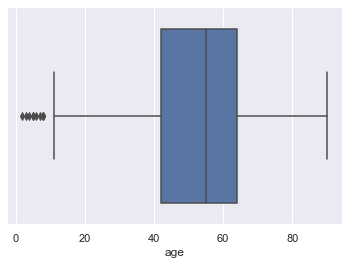

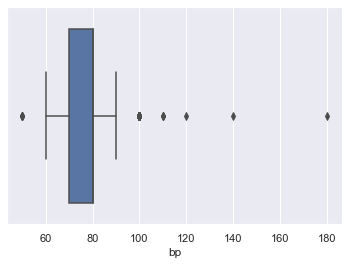

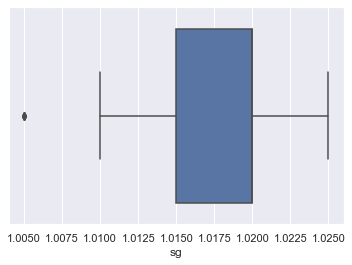

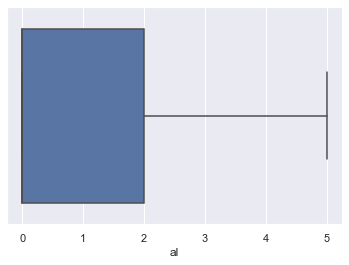

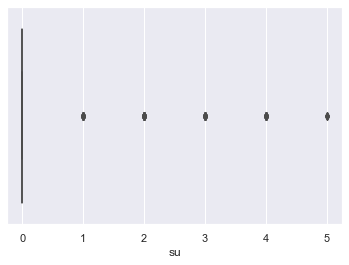

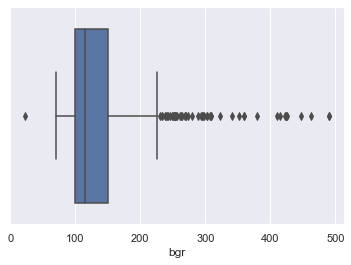

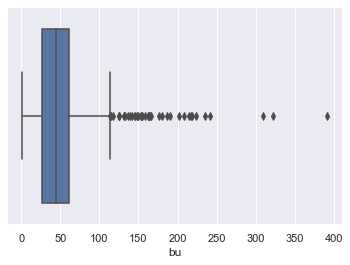

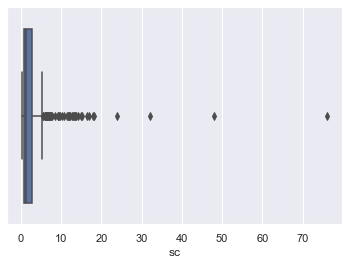

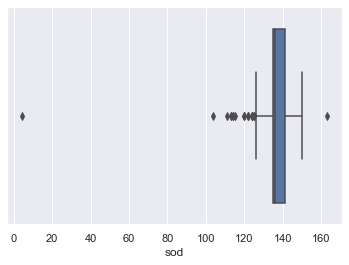

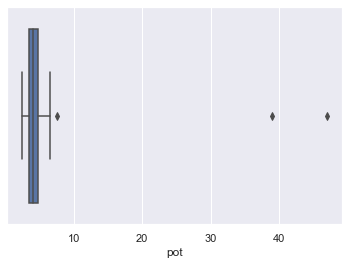

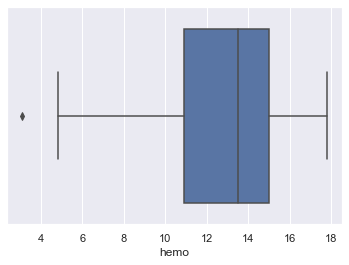

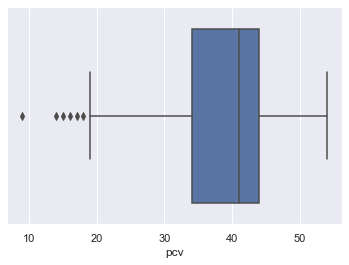

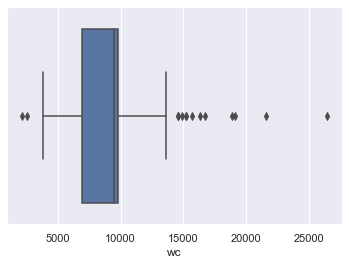

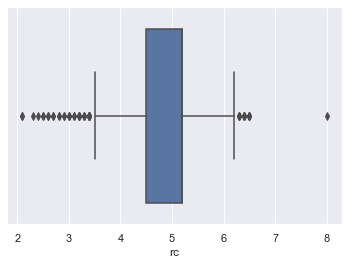

In [76]:
def boxplots(col):
    sns.boxplot(df_imputed[col])
    plt.show()

for i in list(df_imputed.select_dtypes(exclude=['object']).columns)[1:]:
    boxplots(i)
    

In [82]:
# check imbalnce is there or not
df_imputed['classification'].value_counts()

# We will consider this a balance as its less than twice of data

ckd       250
notckd    150
Name: classification, dtype: int64

In [83]:
# Split the data ito X and Y
x=df_imputed.iloc[:,:-1]
y=df_imputed.iloc[:,-1]
x.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0.0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,15.4,44,7800,5.2,yes,yes,no,good,no,no
1,1.0,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,11.3,38,6000,5.2,no,no,no,good,no,no
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,9.6,31,7500,5.2,no,yes,no,poor,no,yes
3,3.0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,11.2,32,6700,3.9,yes,no,no,poor,yes,yes
4,4.0,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,11.6,35,7300,4.6,no,no,no,good,no,no


In [84]:
y.head()

0    ckd
1    ckd
2    ckd
3    ckd
4    ckd
Name: classification, dtype: object

In [85]:
x.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

In [86]:
# we will use one hot encoding here. We can use label as well 
x=pd.get_dummies(x,columns=['rbc', 'pc', 'pcc', 'ba',
                            'htn', 'dm',
                            'cad','appet', 'pe', 'ane'],
                drop_first=True)
# drop first column for each one hot 

In [87]:
x.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,0.0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,135.0,...,1,1,0,0,1,1,0,0,0,0
1,1.0,7.0,50.0,1.020,4.0,0.0,99.0,18.0,0.8,135.0,...,1,1,0,0,0,0,0,0,0,0
2,2.0,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,135.0,...,1,1,0,0,0,1,0,1,0,1
3,3.0,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,...,1,0,1,0,1,0,0,1,1,1
4,4.0,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,135.0,...,1,1,0,0,0,0,0,0,0,0


In [88]:
x.shape

(400, 25)

In [ ]:
# remove the id
x=x.drop(['id'],axis=1)

In [95]:
x.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,135.0,3.5,...,1,1,0,0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,99.0,18.0,0.8,135.0,3.5,...,1,1,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,135.0,3.5,...,1,1,0,0,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,1,0,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,135.0,3.5,...,1,1,0,0,0,0,0,0,0,0


In [96]:
# Feature Scaling
# There are lots of outliers- but we will not remove it as hearthcare data those can be true outliers
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

In [97]:
# PCA method for understanding only
x.shape
#Normally we use PCA when we have hige number of variables

(400, 24)

In [99]:
from sklearn.decomposition import PCA   
# problem with PCA is no visibility
pca=PCA(0.95)
x_PCA=pca.fit_transform(x_scaler)
print(x.shape)
print(x_PCA.shape)  # converted to 20 variables

(400, 24)
(400, 20)


In [92]:
# LDA Approach- Linear Discrimanant Analysis
# just for learning
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

In [100]:
LDA=lda()
x_lda=LDA.fit_transform(x_scaler,y)
print(x.shape)
print(x_lda.shape)

(400, 24)
(400, 1)


In [ ]:
# splitting the data

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.2,random_state=1)

In [ ]:
# Build the model
# we will build all models in one go

In [107]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC   # support vector classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.naive_bayes import BernoulliNB



              Method Used  Accuracy
0      LogisticRegression    0.9750
1            DecisionTree    1.0000
2            RandomForest    1.0000
3  Support Vector Machine    0.9625
4     K nearest Neighbors    0.9250
5      Naive Bayes Theorm    0.9500
6                  voting    0.9875
AxesSubplot(0.125,0.125;0.775x0.755)


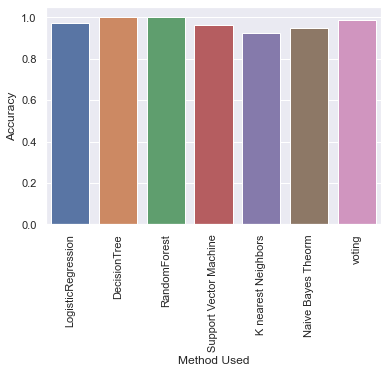

In [109]:
list_met=[]
list_accuracy=[]

# logistic Regression
logit=LogisticRegression()
logit=logit.fit(x_train,y_train)
y_pred_lr=logit.predict(x_test)
accuracy_lr=accuracy_score(y_test,y_pred_lr)

# Decision Tree Regression
dt=DecisionTreeClassifier()
dt=dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
accuracy_dt=accuracy_score(y_test,y_pred_dt)

# Random Forest
rf=RandomForestClassifier()
rf=rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
accuracy_rf=accuracy_score(y_test,y_pred_rf)

# SVM
svc=SVC()
svc=svc.fit(x_train,y_train)
y_pred_svc=svc.predict(x_test)
accuracy_svc=accuracy_score(y_test,y_pred_svc)

# KNN
knn=KNeighborsClassifier()
knn=knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
accuracy_knn=accuracy_score(y_test,y_pred_knn)

# Naive Bayes
nb=GaussianNB()
nb=nb.fit(x_train,y_train)
y_pred_nb=nb.predict(x_test)
accuracy_nb=accuracy_score(y_test,y_pred_nb)

# combining all the above model with voting classifier

model_evc=VotingClassifier(estimators=[('logit',logit),('dt',dt),('rf',rf),
                                 ('svc',svc),('knn',knn),('nb',nb)],
                    voting='hard')
model_evc=model_evc.fit(x_train,y_train)
pred_evc=model_evc.predict(x_test)
accuracy_evc=accuracy_score(y_test,pred_evc)

list1=['LogisticRegression','DecisionTree','RandomForest','Support Vector Machine',
      'K nearest Neighbors','Naive Bayes Theorm','voting']
list2=[accuracy_lr,accuracy_dt,accuracy_rf,accuracy_svc,accuracy_knn,accuracy_nb,accuracy_evc]

list3=[logit,dt,rf,svc,knn,nb,model_evc]

df_accuracy=pd.DataFrame({'Method Used': list1,'Accuracy':list2})

print(df_accuracy)
chart=sns.barplot(x='Method Used',y='Accuracy',data=df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
print(chart)

In [113]:
pred_evc_train=model_evc.predict(x_train)
pred_evc_test=model_evc.predict(x_test)
accuracy_evc_train=accuracy_score(y_train,pred_evc_train)
accuracy_evc_test=accuracy_score(y_test,pred_evc_test)
print(accuracy_evc_train)
print('******************************')
print(accuracy_evc_test)

# excellent accuracy we are getting- no underfitting and overfitting

0.996875
******************************
0.9875


In [117]:
pred_rf_train=rf.predict(x_train)
pred_rf_test=rf.predict(x_test)
accuracy_rf_train=accuracy_score(y_train,pred_rf_train)
accuracy_rf_test=accuracy_score(y_test,pred_rf_test)
print(accuracy_rf_train)
print('******************************')
print(accuracy_rf_test)


1.0
******************************
1.0


In [119]:
class_rf_train=classification_report(y_train,pred_rf_train)
class_rf_test=classification_report(y_test,pred_rf_test)

print(class_rf_train)
print('******************************')
print(class_rf_test)


              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00       203
      notckd       1.00      1.00      1.00       117

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

******************************
              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        47
      notckd       1.00      1.00      1.00        33

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [120]:
cnf_rf_train=confusion_matrix(y_train,pred_rf_train)
cnf_rf_test=confusion_matrix(y_test,pred_rf_test)

print(cnf_rf_train)
print('******************************')
print(cnf_rf_test)


[[203   0]
 [  0 117]]
******************************
[[47  0]
 [ 0 33]]


In [ ]:
# in this case we will trust voting more than rf as rf is also a ensemble technique like voting
# voting is considering rf as well

# HyperParameter tuning--

In [118]:
# Grid SearchCV
from sklearn.model_selection import GridSearchCV

In [122]:
tuned_parameters=[{'n_estimators':[7,10,20,25,30],'max_depth':[2,4,6,9],
                  'class_weight':[None,{0:0.33,1:0.67},'balanced'],'random_state':[42]}]
clf=GridSearchCV(RandomForestClassifier(criterion='entropy'),tuned_parameters,cv=10)
clf.fit(x_train,y_train)
print('Detailed Classification report:')
y_true,lr_pred=y_test,clf.predict(x_test)
print(classification_report(y_true,lr_pred))
print('*******************************************')
print(accuracy_score(y_true,lr_pred))

# default was giving better accuracy

Detailed Classification report:
              precision    recall  f1-score   support

         ckd       1.00      0.98      0.99        47
      notckd       0.97      1.00      0.99        33

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

*******************************************
0.9875


In [123]:
clf.best_params_

{'class_weight': None, 'max_depth': 2, 'n_estimators': 25, 'random_state': 42}